<a href="https://colab.research.google.com/github/nupursjsu/Deep-Learning/blob/master/homework_1/CIFAR_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification for CIFAR dataset

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

In [0]:
path = untar_data(URLs.CIFAR);

In [29]:
path.ls()

[PosixPath('/root/.fastai/data/cifar10/train'),
 PosixPath('/root/.fastai/data/cifar10/test'),
 PosixPath('/root/.fastai/data/cifar10/models'),
 PosixPath('/root/.fastai/data/cifar10/labels.txt')]

In [0]:
path_train = path/'train'
path_test = path/'test'

In [31]:
path_train.ls()

[PosixPath('/root/.fastai/data/cifar10/train/truck'),
 PosixPath('/root/.fastai/data/cifar10/train/automobile'),
 PosixPath('/root/.fastai/data/cifar10/train/horse'),
 PosixPath('/root/.fastai/data/cifar10/train/bird'),
 PosixPath('/root/.fastai/data/cifar10/train/cat'),
 PosixPath('/root/.fastai/data/cifar10/train/frog'),
 PosixPath('/root/.fastai/data/cifar10/train/ship'),
 PosixPath('/root/.fastai/data/cifar10/train/airplane'),
 PosixPath('/root/.fastai/data/cifar10/train/deer'),
 PosixPath('/root/.fastai/data/cifar10/train/dog')]

In [32]:
path_test.ls()

[PosixPath('/root/.fastai/data/cifar10/test/truck'),
 PosixPath('/root/.fastai/data/cifar10/test/automobile'),
 PosixPath('/root/.fastai/data/cifar10/test/horse'),
 PosixPath('/root/.fastai/data/cifar10/test/bird'),
 PosixPath('/root/.fastai/data/cifar10/test/cat'),
 PosixPath('/root/.fastai/data/cifar10/test/frog'),
 PosixPath('/root/.fastai/data/cifar10/test/ship'),
 PosixPath('/root/.fastai/data/cifar10/test/airplane'),
 PosixPath('/root/.fastai/data/cifar10/test/deer'),
 PosixPath('/root/.fastai/data/cifar10/test/dog')]

In [33]:
data = ImageDataBunch.from_folder(path=path, train='train', valid='test', size=32, bs=bs, ds_tfms=get_transforms(), num_workers=0)
data.normalize(cifar_stats)

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
truck,truck,truck,truck,truck
Path: /root/.fastai/data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
truck,truck,truck,truck,truck
Path: /root/.fastai/data/cifar10;

Test: None

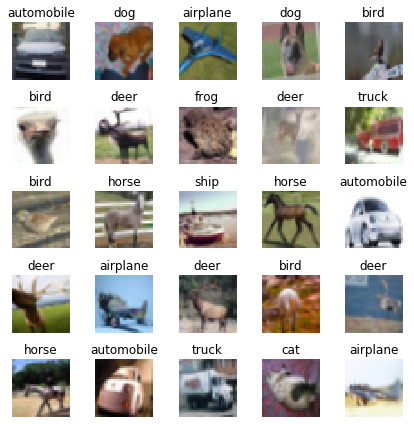

In [34]:
data.show_batch(rows=5, figsize=(6,6))

In [35]:
data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [37]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.690511,1.472079,0.521800,12:38
1,1.322331,1.153512,0.411500,12:20
2,1.171493,1.018423,0.361200,12:15
3,1.101484,1.005052,0.350900,12:15


In [38]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


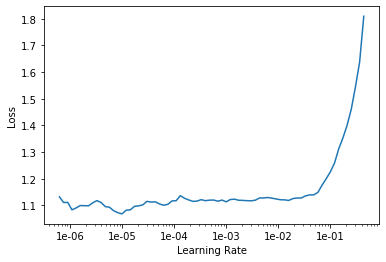

In [39]:
learn.recorder.plot()

In [40]:
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.119667,0.949659,0.336700,12:19
1,0.904004,0.815408,0.292200,12:17
2,0.836746,0.722117,0.254300,12:16
3,0.786935,0.703031,0.246500,12:13


In [0]:
learn.save('stage-1-8-epochs')

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


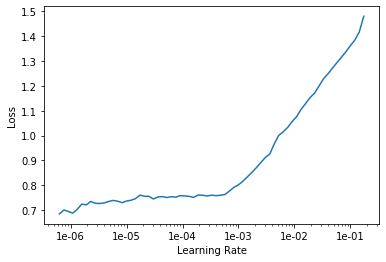

In [43]:
learn.lr_find()
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.763647,0.693832,0.245200,23:53
1,0.760687,0.671116,0.237400,23:08
2,0.737692,0.668373,0.239000,23:07
3,0.713200,0.673100,0.239100,23:08


In [0]:
learn.save('stage-2-4-epochs')

In [46]:
pred = ClassificationInterpretation.from_learner(learn)

In [47]:
pred.most_confused(min_val=20)

[('dog', 'cat', 190),
 ('cat', 'frog', 146),
 ('bird', 'frog', 100),
 ('deer', 'frog', 97),
 ('automobile', 'truck', 96),
 ('cat', 'dog', 93),
 ('deer', 'horse', 71),
 ('bird', 'deer', 68),
 ('truck', 'automobile', 68),
 ('dog', 'frog', 67),
 ('dog', 'horse', 64),
 ('cat', 'deer', 63),
 ('deer', 'bird', 63),
 ('bird', 'airplane', 60),
 ('cat', 'bird', 56),
 ('ship', 'airplane', 53),
 ('airplane', 'ship', 52),
 ('cat', 'horse', 48),
 ('dog', 'deer', 39),
 ('ship', 'automobile', 37),
 ('airplane', 'truck', 35),
 ('dog', 'bird', 35),
 ('airplane', 'bird', 33),
 ('bird', 'dog', 32),
 ('bird', 'cat', 31),
 ('deer', 'cat', 31),
 ('horse', 'deer', 30),
 ('truck', 'airplane', 30),
 ('ship', 'truck', 29),
 ('cat', 'truck', 27),
 ('horse', 'dog', 25),
 ('bird', 'horse', 24),
 ('horse', 'frog', 24),
 ('frog', 'cat', 23),
 ('horse', 'truck', 22),
 ('airplane', 'automobile', 21),
 ('horse', 'cat', 21)]

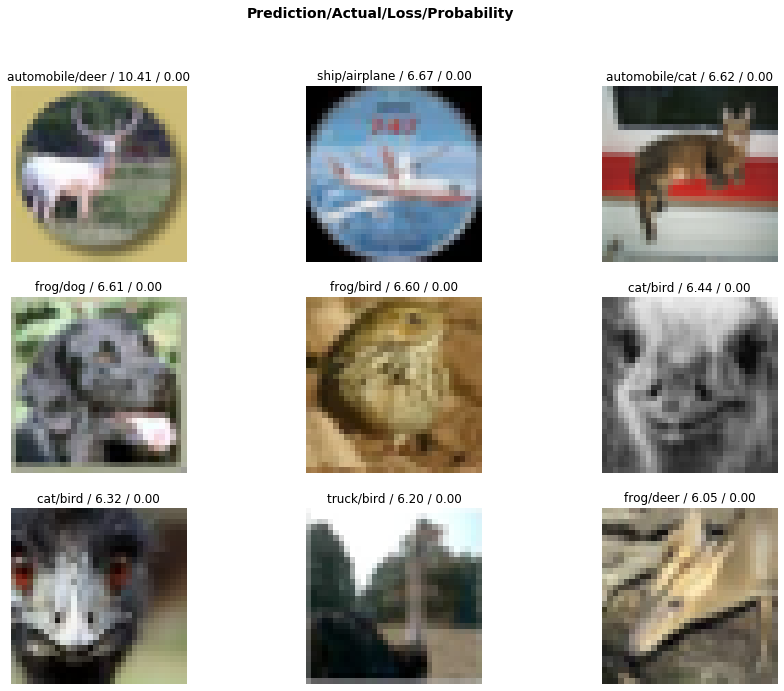

In [48]:
pred.plot_top_losses(9, figsize=(15,11))

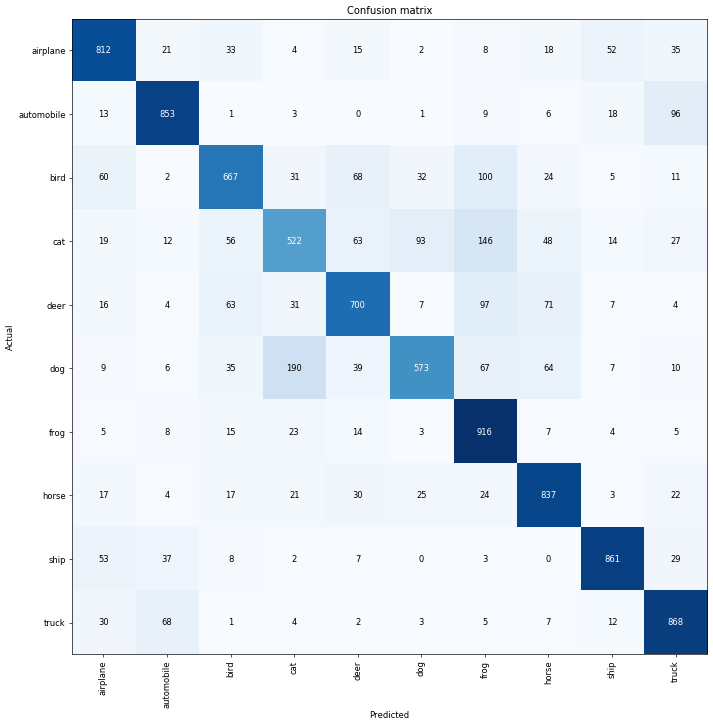

In [49]:
pred.plot_confusion_matrix(figsize=(12,12), dpi=60)